In [10]:
import os

In [11]:
file_list = ["./data/CSE3F-GUEST-1520472698/ap_selected.txt",
             "./data/CSE3F-PROTECTED-1520471250/ap_selected.txt",
             "./data/LIB_GUEST-1520484258/ap_selected.txt",
             "./data/LIB_PROTECTED-1520479701/ap_selected.txt",
             "./data/PC_GUEST-1521341138/ap_selected.txt",
             "./data/PC-GUEST-1521327683/ap_selected.txt",
             "./data/PC-PROTECTED-1521325439/ap_selected.txt",
             "./data/PC-PROTECTED-1521339668/ap_selected.txt"]
file_list_1 = ["./data/CSE3F-GUEST-1520472698/bandwidth.txt",
               "./data/CSE3F-PROTECTED-1520471250/bandwidth.txt",
               "./data/LIB_GUEST-1520484258/bandwidth.txt",
               "./data/LIB_PROTECTED-1520479701/bandwidth.txt",
               "./data/PC_GUEST-1521341138/bandwidth.txt",
               "./data/PC-GUEST-1521327683/bandwidth.txt",
               "./data/PC-PROTECTED-1521325439/bandwidth.txt",
               "./data/PC-PROTECTED-1521339668/bandwidth.txt"]
file_list_2 = ["./data/CSE3F-GUEST-1520472698/latency.txt",
               "./data/CSE3F-PROTECTED-1520471250/latency.txt",
               "./data/LIB_GUEST-1520484258/latency.txt",
               "./data/LIB_PROTECTED-1520479701/latency.txt",
               "./data/PC_GUEST-1521341138/latency.txt",
               "./data/PC-GUEST-1521327683/latency.txt",
               "./data/PC-PROTECTED-1521325439/latency.txt",
               "./data/PC-PROTECTED-1521339668/latency.txt"]


In [12]:
#0 cse3f_guest
#1 cse3f_protect
#2 lib_guest
#3 lib_protect
#4 pc_guest_1
#5 pc_guest_2
#6 pc_protected_1
#7 pc_protected_2
import math

dict_all = []
for i in range(0, len(file_list)):
    dict_ = {}
    file_ = file_list[i]
    with open(file_) as f:
        for line in f:
            line_ = line.strip().replace(" ", "")
            if "MACAddress" in line_:
                #print line_
                MACAddress = line_[line_.index(":") + 1:]
                #print MACAddress
                if MACAddress not in dict_.keys():
                    #print MACAddress
                    dict_[MACAddress] = {}
                #print MACAddress
            if "PHY" in line_:
                type_ = line_.split(":")[1].strip()
                if type_ == "802.11g/n" or type_ == "802.11n":
                    dict_[MACAddress]["type"] = 0.0
                else:
                    dict_[MACAddress]["type"] = 1.0
            if "RSSI" in line_:
                #print line_
                RSSI = line_[line_.index(":") + 1:]
                dict_[MACAddress]["RSSI"] = RSSI
                #print RSSI
            if "AverageSignalQuality" in line_:
                #print line_
                AverageSignalQuality = line_[line_.index(":") + 1:]
                dict_[MACAddress]["AverageSignalQuality"] = AverageSignalQuality
                #print AverageSignalQuality
            if "ChannelUtilization" in line_:
                #print line_
                ChannelUtilization = line_[line_.index(":") + 1:line_.index("%")]
                dict_[MACAddress]["ChannelUtilization"] = ChannelUtilization
                #print ChannelUtilization
                #break
            if "MaximumSpeed" in line_:
                #print line_
                MaximumSpeed = line_[line_.index(":") + 1:line_.index("Mbps")]
                dict_[MACAddress]["MaximumSpeed"] = MaximumSpeed
                #print MaximumSpeed
            if "ChannelWidth" in line_:
                #print line_
                ChannelWidth = line_[line_.index(":") + 1:line_.index("MHz")]
                dict_[MACAddress]["ChannelWidth"] = ChannelWidth
                #print ChannelWidth
            if "Frequency" in line_:
                #print line_
                Frequency = line_[line_.index(":") + 1:]
                dict_[MACAddress]["Frequency"] = Frequency
                #print Frequency
            if "Channel" in line_ and "ChannelsRange" not in line_ and "ChannelWidth" not in line_ and "ChannelUtilization" not in line_:
                #print line_
                Channel = line_[line_.index(":") + 1:]
                dict_[MACAddress]["Channel"] = Channel
                #print Channel

    file_ = file_list_1[i]
    with open(file_) as f:
        for line in f:
            line_ = line.strip().replace(" ", "")
            #print line_
            if "==" in line_:
                line_ = line_[4:-4]
                #print line_
                MACAddress = line_
            if "MB/s" in line_:
                dict_[MACAddress]["bandwidth"] = line_[line_.index("(") + 1 : line_.index("MB/s")]
            if "KB/s" in line_:
                temp = line_[line_.index("(") + 1 : line_.index("KB/s")]
                temp = float(temp) * 0.001
                dict_[MACAddress]["bandwidth"] = temp
    

    file_ = file_list_2[i]
    with open(file_) as f:
        for line in f:
            line_ = line.strip().replace(" ", "")
            #print line_
            if "==" in line_:
                line_ = line_[4:-4]
                #print line_
                MACAddress = line_
                #print MACAddress
            if "avg" in line_:
                dict_[MACAddress]["latency"] = line_[line_.index(":") + 1 : line_.index(",")]
                res = float(line_[line_.index(":") + 1 : line_.index(",")])
                if math.isnan(res):
                    try:
                        del dict_[MACAddress]
                    except KeyError:
                        pass
                    
    if "bandwidth" not in dict_[MACAddress].keys():
        try:
            del dict_[MACAddress]
        except KeyError:
            pass
        
    dict_all.append(dict_)

In [13]:
attribute_list = dict_all[0][dict_all[0].keys()[0]].keys()
print attribute_list
print "index of latency: ", attribute_list.index('latency')
print "index of bandwidth: ", attribute_list.index('bandwidth')
print "index of type: ", attribute_list.index('type')
print "length of attribute: ", len(attribute_list)
cnt = 0
list_address_num = []
for dict_ in dict_all:
    cnt += len(dict_.keys())
    list_address_num.append(len(dict_.keys()))
print list_address_num

['latency', 'ChannelWidth', 'ChannelUtilization', 'MaximumSpeed', 'AverageSignalQuality', 'bandwidth', 'Frequency', 'RSSI', 'type', 'Channel']
index of latency:  0
index of bandwidth:  5
index of type:  8
length of attribute:  10
[11, 9, 13, 16, 12, 18, 18, 19]


In [14]:
print dict_all[0]["A0-3D-6F-0B-A5-E1"]
import numpy as np
from sklearn import tree
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

{'latency': '14.157599999999999', 'ChannelWidth': '20', 'ChannelUtilization': '37.6', 'MaximumSpeed': '216', 'AverageSignalQuality': '68.0', 'bandwidth': 0.746, 'Frequency': '2.437', 'RSSI': '-66', 'type': 0.0, 'Channel': '6'}


In [22]:
def mean(list_):
    return sum(list_) * 1.0 / len(list_)

In [27]:
#np.concatenate((a, b))
recall_tree_list = []
recall_bayes_list = []
recall_random_list = []
recall_svm_list = []
acc_tree_list = []
acc_bayes_list= []
acc_random_list = []
acc_svm_list = []
position = ["cse3f_guest", "cse3f_protect", "lib_guest", "lib_protect",
            "pc_guest_1", "pc_guest_2", "pc_protected_1", "pc_protected_2"]

print "begin"
for alpha_ in np.arange(0.1, 0.9, 0.01):
    beta_ = 1- alpha_
    print alpha_
    list_label = []
    list_label_rssi = []
    array_all = np.zeros((0, 8))
    array_all_2 = np.zeros((0, 10))

    temp_cnt = 0
    for dict_ in dict_all:
        temp_cnt += 1
        #print "dict_:", temp_cnt

        cnt_temp = 0
        for i in range(len(dict_.keys())):
            address = dict_.keys()[i]
            dict_temp = dict_[address]
            if "bandwidth" in dict_temp.keys():
                cnt_temp += 1

        array_ = np.zeros((cnt_temp, 10))
        #print "cnt_temp: ", cnt_temp
        i = 0
        for address in dict_.keys():
            dict_temp = dict_[address]
            if "bandwidth" not in dict_temp.keys():
                continue
            for j in range(len(attribute_list)):
                attribute = attribute_list[j]
                array_[i][j] = float(dict_[address][attribute])
            i += 1
        #print "i: ", i
        array_2 = np.zeros(array_.shape)
        for i_ in range(array_.shape[0]):
            for j_ in range(array_.shape[1]):
                if j_ == 8:
                    array_2[i_,j_] = array_[i_,j_]
                    #print array_2[i_,j_]
                else:
                    array_2[i_,j_] = (array_[i_,j_] - min(array_[:,j_])) / (max(array_[:,j_]) - min(array_[:,j_]))

        priority_ = np.zeros((array_2.shape[0], 1))
        for k in range(array_2.shape[0]):
            priority_[k] = -alpha_ * array_2[k][0] + beta_ * array_2[k][5]

        priority_.resize((1, array_2.shape[0]))

        rssi_ = array_2[:,7]

        z = np.argsort(priority_)
        z_ = np.argsort(rssi_)
        #print priority_
        #print z
        for k_ in range(array_2.shape[0]):
            if k_ in z[0, -int(math.ceil(0.2*array_2.shape[0])):]:
                list_label.append(1)
            else:
                list_label.append(0)
        for k_ in range(array_2.shape[0]):
            if k_ in z_[-int(math.ceil(0.2*array_2.shape[0])):]:
                list_label_rssi.append(1)
            else:
                list_label_rssi.append(0)
        array_3= np.zeros((array_.shape[0], 8))
        array_3[:,0:4] = array_2[:, 1:5]
        array_3[:,4:] = array_2[:, 6:]

        array_all = np.concatenate((array_all, array_3)) 
        array_all_2 = np.concatenate((array_all_2, array_))

    array_all_3 = array_all[:,[1,4,5,6,7]]


    #different for testing
    #print array_all.shape
    recall_tree = []
    accuracy_tree = []
    for i in range(len(list_address_num)):
        pre_ = sum(list_address_num[:i])
        post_ = sum(list_address_num[i + 1:])
        label_pick = list_label[:pre_] + list_label[-post_:]
        np_label = np.asarray(label_pick)
        array_pick = np.concatenate((array_all_3[:pre_], array_all_3[-post_:]))

        clf = tree.DecisionTreeClassifier()
        clf = clf.fit(array_pick, np_label)

        res = clf.predict(array_all_3[pre_:-(post_+1)])
        true_label = list_label[pre_: -(post_+1)]
        cnt = 0

        true_pos = 0
        true_neg = 0
        false_pos = 0
        false_neg = 0
        for j in range(res.shape[0]):
            if res[j] == true_label[j]:
                cnt += 1
                if true_label[j] == 1:
                    true_pos += 1
                else: 
                    true_neg += 1

            elif true_label[j] == 1:
                false_pos += 1
            else:
                false_neg += 1
        print position[i] + ": " + str(cnt) + " out of " + str(res.shape[0])
        print "pos: " + str(true_label.count(1)) + " " + "neg: " + str(true_label.count(0))
        print "true_pos: " + str(true_pos) + " " + "true_neg: " + str(true_neg) + " " + "false_pos: " + str(false_pos) + " " + "false_neg: " + str(false_neg)
        print " "   
        if true_pos != 0:
            recall = true_pos * 1.0 / true_label.count(1)
            arruracy = true_pos * 1.0 / (true_pos + false_neg)
        else:
            recall = 0
            arruracy = 0
        recall_tree.append(recall)
        accuracy_tree.append(arruracy)
        print "recall: ",recall 
        print "arruracy: ",arruracy
        print " "
    recall_tree_list.append(mean(recall_tree))
    acc_tree_list.append(mean(accuracy_tree))

    #different for testing
    #print array_all.shape
    recall_svm = []
    accuracy_svm = []
    for i in range(len(list_address_num)):
        pre_ = sum(list_address_num[:i])
        post_ = sum(list_address_num[i + 1:])
        label_pick = list_label[:pre_] + list_label[-post_:]
        np_label = np.asarray(label_pick)
        array_pick = np.concatenate((array_all_3[:pre_], array_all_3[-post_:]))

        clf = svm.SVC()
        clf = clf.fit(array_pick, np_label)

        res = clf.predict(array_all_3[pre_:-(post_+1)])
        true_label = list_label[pre_: -(post_+1)]
        cnt = 0

        true_pos = 0
        true_neg = 0
        false_pos = 0
        false_neg = 0
        for j in range(res.shape[0]):
            if res[j] == true_label[j]:
                cnt += 1
                if true_label[j] == 1:
                    true_pos += 1
                else: 
                    true_neg += 1

            elif true_label[j] == 1:
                false_pos += 1
            else:
                false_neg += 1
        print position[i] + ": " + str(cnt) + " out of " + str(res.shape[0])
        print "pos: " + str(true_label.count(1)) + " " + "neg: " + str(true_label.count(0))
        print "true_pos: " + str(true_pos) + " " + "true_neg: " + str(true_neg) + " " + "false_pos: " + str(false_pos) + " " + "false_neg: " + str(false_neg)
        
        if true_pos != 0:
            recall = true_pos * 1.0 / true_label.count(1)
            arruracy = true_pos * 1.0 / (true_pos + false_neg)
        else:
            recall = 0
            arruracy = 0
        recall_svm.append(recall)
        accuracy_svm.append(arruracy)
        print "recall: ",recall 
        print "arruracy: ",arruracy
        print " "
    recall_svm_list.append(mean(recall_svm))
    acc_svm_list.append(mean(accuracy_svm))


    #different for testing
    #print array_all.shape
    recall_random = []
    accuracy_random = []
    for i in range(len(list_address_num)):
        pre_ = sum(list_address_num[:i])
        post_ = sum(list_address_num[i + 1:])
        label_pick = list_label[:pre_] + list_label[-post_:]
        np_label = np.asarray(label_pick)
        array_pick = np.concatenate((array_all_3[:pre_], array_all_3[-post_:]))

        clf = RandomForestClassifier(max_depth=3, random_state=0)
        clf = clf.fit(array_pick, np_label)

        res = clf.predict(array_all_3[pre_:-(post_+1)])
        true_label = list_label[pre_: -(post_+1)]
        cnt = 0

        true_pos = 0
        true_neg = 0
        false_pos = 0
        false_neg = 0
        for j in range(res.shape[0]):
            if res[j] == true_label[j]:
                cnt += 1
                if true_label[j] == 1:
                    true_pos += 1
                else: 
                    true_neg += 1

            elif true_label[j] == 1:
                false_pos += 1
            else:
                false_neg += 1
        print position[i] + ": " + str(cnt) + " out of " + str(res.shape[0])
        print "pos: " + str(true_label.count(1)) + " " + "neg: " + str(true_label.count(0))
        print "true_pos: " + str(true_pos) + " " + "true_neg: " + str(true_neg) + " " + "false_pos: " + str(false_pos) + " " + "false_neg: " + str(false_neg)
        print " "

        if true_pos != 0:
            recall = true_pos * 1.0 / true_label.count(1)
            arruracy = true_pos * 1.0 / (true_pos + false_neg)
        else:
            recall = 0
            arruracy = 0
        recall_random.append(recall)
        accuracy_random.append(arruracy)
        print "recall: ",recall 
        print "arruracy: ",arruracy
        print " "
    recall_random_list.append(mean(recall_random))
    acc_random_list.append(mean(accuracy_random))

    #different for testing
    #print array_all.shape
    recall_naive_bayes = []
    accuracy_naive_bayes = [] 
    for i in range(len(list_address_num)):
        pre_ = sum(list_address_num[:i])
        post_ = sum(list_address_num[i + 1:])
        label_pick = list_label[:pre_] + list_label[-post_:]
        np_label = np.asarray(label_pick)
        array_pick = np.concatenate((array_all_3[:pre_], array_all_3[-post_:]))

        clf = GaussianNB()
        clf = clf.fit(array_pick, np_label)

        res = clf.predict(array_all_3[pre_:-(post_+1)])
        true_label = list_label[pre_: -(post_+1)]
        cnt = 0

        true_pos = 0
        true_neg = 0
        false_pos = 0
        false_neg = 0
        for j in range(res.shape[0]):
            if res[j] == true_label[j]:
                cnt += 1
                if true_label[j] == 1:
                    true_pos += 1
                else: 
                    true_neg += 1

            elif true_label[j] == 1:
                false_pos += 1
            else:
                false_neg += 1
        print position[i] + ": " + str(cnt) + " out of " + str(res.shape[0])
        print "pos: " + str(true_label.count(1)) + " " + "neg: " + str(true_label.count(0))
        print "true_pos: " + str(true_pos) + " " + "true_neg: " + str(true_neg) + " " + "false_pos: " + str(false_pos) + " " + "false_neg: " + str(false_neg)
        print " " 

        if true_pos != 0:
            recall = true_pos * 1.0 / true_label.count(1)
            arruracy = true_pos * 1.0 / (true_pos + false_neg)
        else:
            recall = 0
            arruracy = 0
        recall_naive_bayes.append(recall)
        accuracy_naive_bayes.append(arruracy)
        print "recall: ",recall 
        print "arruracy: ",arruracy
        print " "
    recall_bayes_list.append(mean(recall_naive_bayes))
    acc_bayes_list.append(mean(accuracy_naive_bayes))


begin
0.1
cse3f_guest: 8 out of 8
pos: 3 neg: 5
true_pos: 3 true_neg: 5 false_pos: 0 false_neg: 0
 
recall:  1.0
arruracy:  1.0
 
cse3f_protect: 5 out of 6
pos: 2 neg: 4
true_pos: 2 true_neg: 3 false_pos: 0 false_neg: 1
 
recall:  1.0
arruracy:  0.666666666667
 
lib_guest: 5 out of 10
pos: 3 neg: 7
true_pos: 1 true_neg: 4 false_pos: 2 false_neg: 3
 
recall:  0.333333333333
arruracy:  0.25
 
lib_protect: 11 out of 13
pos: 3 neg: 10
true_pos: 3 true_neg: 8 false_pos: 0 false_neg: 2
 
recall:  1.0
arruracy:  0.6
 
pc_guest_1: 7 out of 9
pos: 3 neg: 6
true_pos: 1 true_neg: 6 false_pos: 2 false_neg: 0
 
recall:  0.333333333333
arruracy:  1.0
 
pc_guest_2: 7 out of 15
pos: 4 neg: 11
true_pos: 1 true_neg: 6 false_pos: 3 false_neg: 5
 
recall:  0.25
arruracy:  0.166666666667
 
pc_protected_1: 9 out of 15
pos: 3 neg: 12
true_pos: 1 true_neg: 8 false_pos: 2 false_neg: 4
 
recall:  0.333333333333
arruracy:  0.2
 
pc_protected_2: 16 out of 16
pos: 3 neg: 13
true_pos: 3 true_neg: 13 false_pos: 0 fa

arruracy:  1.0
 
cse3f_protect: 5 out of 6
pos: 2 neg: 4
true_pos: 1 true_neg: 4 false_pos: 1 false_neg: 0
 
recall:  0.5
arruracy:  1.0
 
lib_guest: 8 out of 10
pos: 3 neg: 7
true_pos: 1 true_neg: 7 false_pos: 2 false_neg: 0
 
recall:  0.333333333333
arruracy:  1.0
 
lib_protect: 10 out of 13
pos: 3 neg: 10
true_pos: 1 true_neg: 9 false_pos: 2 false_neg: 1
 
recall:  0.333333333333
arruracy:  0.5
 
pc_guest_1: 8 out of 9
pos: 2 neg: 7
true_pos: 1 true_neg: 7 false_pos: 1 false_neg: 0
 
recall:  0.5
arruracy:  1.0
 
pc_guest_2: 11 out of 15
pos: 4 neg: 11
true_pos: 0 true_neg: 11 false_pos: 4 false_neg: 0
 
recall:  0
arruracy:  0
 
pc_protected_1: 11 out of 15
pos: 3 neg: 12
true_pos: 0 true_neg: 11 false_pos: 3 false_neg: 1
 
recall:  0
arruracy:  0
 
pc_protected_2: 13 out of 16
pos: 3 neg: 13
true_pos: 0 true_neg: 13 false_pos: 3 false_neg: 0
 
recall:  0
arruracy:  0
 
cse3f_guest: 8 out of 8
pos: 3 neg: 5
true_pos: 3 true_neg: 5 false_pos: 0 false_neg: 0
 
recall:  1.0
arruracy: 

recall:  1.0
arruracy:  1.0
 
lib_protect: 11 out of 13
pos: 3 neg: 10
true_pos: 3 true_neg: 8 false_pos: 0 false_neg: 2
 
recall:  1.0
arruracy:  0.6
 
pc_guest_1: 5 out of 9
pos: 2 neg: 7
true_pos: 2 true_neg: 3 false_pos: 0 false_neg: 4
 
recall:  1.0
arruracy:  0.333333333333
 
pc_guest_2: 5 out of 15
pos: 4 neg: 11
true_pos: 2 true_neg: 3 false_pos: 2 false_neg: 8
 
recall:  0.5
arruracy:  0.2
 
pc_protected_1: 9 out of 15
pos: 3 neg: 12
true_pos: 1 true_neg: 8 false_pos: 2 false_neg: 4
 
recall:  0.333333333333
arruracy:  0.2
 
pc_protected_2: 7 out of 16
pos: 3 neg: 13
true_pos: 2 true_neg: 5 false_pos: 1 false_neg: 8
 
recall:  0.666666666667
arruracy:  0.2
 
0.17
cse3f_guest: 8 out of 8
pos: 3 neg: 5
true_pos: 3 true_neg: 5 false_pos: 0 false_neg: 0
 
recall:  1.0
arruracy:  1.0
 
cse3f_protect: 5 out of 6
pos: 2 neg: 4
true_pos: 2 true_neg: 3 false_pos: 0 false_neg: 1
 
recall:  1.0
arruracy:  0.666666666667
 
lib_guest: 6 out of 10
pos: 3 neg: 7
true_pos: 2 true_neg: 4 false

true_pos: 3 true_neg: 8 false_pos: 0 false_neg: 2
 
recall:  1.0
arruracy:  0.6
 
pc_guest_1: 5 out of 9
pos: 2 neg: 7
true_pos: 2 true_neg: 3 false_pos: 0 false_neg: 4
 
recall:  1.0
arruracy:  0.333333333333
 
pc_guest_2: 5 out of 15
pos: 4 neg: 11
true_pos: 2 true_neg: 3 false_pos: 2 false_neg: 8
 
recall:  0.5
arruracy:  0.2
 
pc_protected_1: 9 out of 15
pos: 3 neg: 12
true_pos: 1 true_neg: 8 false_pos: 2 false_neg: 4
 
recall:  0.333333333333
arruracy:  0.2
 
pc_protected_2: 7 out of 16
pos: 3 neg: 13
true_pos: 2 true_neg: 5 false_pos: 1 false_neg: 8
 
recall:  0.666666666667
arruracy:  0.2
 
0.2
cse3f_guest: 8 out of 8
pos: 3 neg: 5
true_pos: 3 true_neg: 5 false_pos: 0 false_neg: 0
 
recall:  1.0
arruracy:  1.0
 
cse3f_protect: 6 out of 6
pos: 2 neg: 4
true_pos: 2 true_neg: 4 false_pos: 0 false_neg: 0
 
recall:  1.0
arruracy:  1.0
 
lib_guest: 6 out of 10
pos: 3 neg: 7
true_pos: 1 true_neg: 5 false_pos: 2 false_neg: 2
 
recall:  0.333333333333
arruracy:  0.333333333333
 
lib_prot

 
recall:  0.333333333333
arruracy:  0.333333333333
 
lib_protect: 11 out of 13
pos: 3 neg: 10
true_pos: 3 true_neg: 8 false_pos: 0 false_neg: 2
 
recall:  1.0
arruracy:  0.6
 
pc_guest_1: 8 out of 9
pos: 2 neg: 7
true_pos: 1 true_neg: 7 false_pos: 1 false_neg: 0
 
recall:  0.5
arruracy:  1.0
 
pc_guest_2: 9 out of 15
pos: 4 neg: 11
true_pos: 1 true_neg: 8 false_pos: 3 false_neg: 3
 
recall:  0.25
arruracy:  0.25
 
pc_protected_1: 10 out of 15
pos: 3 neg: 12
true_pos: 1 true_neg: 9 false_pos: 2 false_neg: 3
 
recall:  0.333333333333
arruracy:  0.25
 
pc_protected_2: 16 out of 16
pos: 3 neg: 13
true_pos: 3 true_neg: 13 false_pos: 0 false_neg: 0
 
recall:  1.0
arruracy:  1.0
 
cse3f_guest: 5 out of 8
pos: 3 neg: 5
true_pos: 0 true_neg: 5 false_pos: 3 false_neg: 0
recall:  0
arruracy:  0
 
cse3f_protect: 4 out of 6
pos: 2 neg: 4
true_pos: 0 true_neg: 4 false_pos: 2 false_neg: 0
recall:  0
arruracy:  0
 
lib_guest: 7 out of 10
pos: 3 neg: 7
true_pos: 0 true_neg: 7 false_pos: 3 false_neg: 0

recall:  1.0
arruracy:  0.333333333333
 
pc_guest_2: 5 out of 15
pos: 4 neg: 11
true_pos: 2 true_neg: 3 false_pos: 2 false_neg: 8
 
recall:  0.5
arruracy:  0.2
 
pc_protected_1: 9 out of 15
pos: 3 neg: 12
true_pos: 1 true_neg: 8 false_pos: 2 false_neg: 4
 
recall:  0.333333333333
arruracy:  0.2
 
pc_protected_2: 7 out of 16
pos: 3 neg: 13
true_pos: 2 true_neg: 5 false_pos: 1 false_neg: 8
 
recall:  0.666666666667
arruracy:  0.2
 
0.27
cse3f_guest: 8 out of 8
pos: 3 neg: 5
true_pos: 3 true_neg: 5 false_pos: 0 false_neg: 0
 
recall:  1.0
arruracy:  1.0
 
cse3f_protect: 6 out of 6
pos: 2 neg: 4
true_pos: 2 true_neg: 4 false_pos: 0 false_neg: 0
 
recall:  1.0
arruracy:  1.0
 
lib_guest: 7 out of 10
pos: 3 neg: 7
true_pos: 2 true_neg: 5 false_pos: 1 false_neg: 2
 
recall:  0.666666666667
arruracy:  0.5
 
lib_protect: 11 out of 13
pos: 3 neg: 10
true_pos: 3 true_neg: 8 false_pos: 0 false_neg: 2
 
recall:  1.0
arruracy:  0.6
 
pc_guest_1: 8 out of 9
pos: 2 neg: 7
true_pos: 1 true_neg: 7 false

true_pos: 3 true_neg: 5 false_pos: 0 false_neg: 0
 
recall:  1.0
arruracy:  1.0
 
cse3f_protect: 5 out of 6
pos: 2 neg: 4
true_pos: 2 true_neg: 3 false_pos: 0 false_neg: 1
 
recall:  1.0
arruracy:  0.666666666667
 
lib_guest: 8 out of 10
pos: 3 neg: 7
true_pos: 3 true_neg: 5 false_pos: 0 false_neg: 2
 
recall:  1.0
arruracy:  0.6
 
lib_protect: 10 out of 13
pos: 3 neg: 10
true_pos: 2 true_neg: 8 false_pos: 1 false_neg: 2
 
recall:  0.666666666667
arruracy:  0.5
 
pc_guest_1: 8 out of 9
pos: 2 neg: 7
true_pos: 1 true_neg: 7 false_pos: 1 false_neg: 0
 
recall:  0.5
arruracy:  1.0
 
pc_guest_2: 12 out of 15
pos: 4 neg: 11
true_pos: 2 true_neg: 10 false_pos: 2 false_neg: 1
 
recall:  0.5
arruracy:  0.666666666667
 
pc_protected_1: 9 out of 15
pos: 3 neg: 12
true_pos: 1 true_neg: 8 false_pos: 2 false_neg: 4
 
recall:  0.333333333333
arruracy:  0.2
 
pc_protected_2: 16 out of 16
pos: 3 neg: 13
true_pos: 3 true_neg: 13 false_pos: 0 false_neg: 0
 
recall:  1.0
arruracy:  1.0
 
cse3f_guest: 5 o

recall:  0.5
arruracy:  1.0
 
pc_guest_2: 11 out of 15
pos: 4 neg: 11
true_pos: 2 true_neg: 9 false_pos: 2 false_neg: 2
 
recall:  0.5
arruracy:  0.5
 
pc_protected_1: 9 out of 15
pos: 3 neg: 12
true_pos: 1 true_neg: 8 false_pos: 2 false_neg: 4
 
recall:  0.333333333333
arruracy:  0.2
 
pc_protected_2: 16 out of 16
pos: 3 neg: 13
true_pos: 3 true_neg: 13 false_pos: 0 false_neg: 0
 
recall:  1.0
arruracy:  1.0
 
cse3f_guest: 5 out of 8
pos: 3 neg: 5
true_pos: 0 true_neg: 5 false_pos: 3 false_neg: 0
recall:  0
arruracy:  0
 
cse3f_protect: 4 out of 6
pos: 2 neg: 4
true_pos: 0 true_neg: 4 false_pos: 2 false_neg: 0
recall:  0
arruracy:  0
 
lib_guest: 7 out of 10
pos: 3 neg: 7
true_pos: 0 true_neg: 7 false_pos: 3 false_neg: 0
recall:  0
arruracy:  0
 
lib_protect: 10 out of 13
pos: 3 neg: 10
true_pos: 0 true_neg: 10 false_pos: 3 false_neg: 0
recall:  0
arruracy:  0
 
pc_guest_1: 7 out of 9
pos: 2 neg: 7
true_pos: 0 true_neg: 7 false_pos: 2 false_neg: 0
recall:  0
arruracy:  0
 
pc_guest_2:

arruracy:  1.0
 
lib_guest: 8 out of 10
pos: 3 neg: 7
true_pos: 1 true_neg: 7 false_pos: 2 false_neg: 0
 
recall:  0.333333333333
arruracy:  1.0
 
lib_protect: 10 out of 13
pos: 3 neg: 10
true_pos: 1 true_neg: 9 false_pos: 2 false_neg: 1
 
recall:  0.333333333333
arruracy:  0.5
 
pc_guest_1: 8 out of 9
pos: 2 neg: 7
true_pos: 1 true_neg: 7 false_pos: 1 false_neg: 0
 
recall:  0.5
arruracy:  1.0
 
pc_guest_2: 11 out of 15
pos: 4 neg: 11
true_pos: 0 true_neg: 11 false_pos: 4 false_neg: 0
 
recall:  0
arruracy:  0
 
pc_protected_1: 11 out of 15
pos: 3 neg: 12
true_pos: 0 true_neg: 11 false_pos: 3 false_neg: 1
 
recall:  0
arruracy:  0
 
pc_protected_2: 13 out of 16
pos: 3 neg: 13
true_pos: 0 true_neg: 13 false_pos: 3 false_neg: 0
 
recall:  0
arruracy:  0
 
cse3f_guest: 8 out of 8
pos: 3 neg: 5
true_pos: 3 true_neg: 5 false_pos: 0 false_neg: 0
 
recall:  1.0
arruracy:  1.0
 
cse3f_protect: 6 out of 6
pos: 2 neg: 4
true_pos: 2 true_neg: 4 false_pos: 0 false_neg: 0
 
recall:  1.0
arruracy: 

true_pos: 1 true_neg: 5 false_pos: 2 false_neg: 0
 
recall:  0.333333333333
arruracy:  1.0
 
cse3f_protect: 5 out of 6
pos: 2 neg: 4
true_pos: 1 true_neg: 4 false_pos: 1 false_neg: 0
 
recall:  0.5
arruracy:  1.0
 
lib_guest: 9 out of 10
pos: 3 neg: 7
true_pos: 2 true_neg: 7 false_pos: 1 false_neg: 0
 
recall:  0.666666666667
arruracy:  1.0
 
lib_protect: 10 out of 13
pos: 3 neg: 10
true_pos: 1 true_neg: 9 false_pos: 2 false_neg: 1
 
recall:  0.333333333333
arruracy:  0.5
 
pc_guest_1: 7 out of 9
pos: 2 neg: 7
true_pos: 1 true_neg: 6 false_pos: 1 false_neg: 1
 
recall:  0.5
arruracy:  0.5
 
pc_guest_2: 6 out of 15
pos: 3 neg: 12
true_pos: 2 true_neg: 4 false_pos: 1 false_neg: 8
 
recall:  0.666666666667
arruracy:  0.2
 
pc_protected_1: 10 out of 15
pos: 3 neg: 12
true_pos: 1 true_neg: 9 false_pos: 2 false_neg: 3
 
recall:  0.333333333333
arruracy:  0.25
 
pc_protected_2: 9 out of 16
pos: 3 neg: 13
true_pos: 2 true_neg: 7 false_pos: 1 false_neg: 6
 
recall:  0.666666666667
arruracy:  0.

recall:  0.5
arruracy:  0.5
 
pc_guest_2: 6 out of 15
pos: 3 neg: 12
true_pos: 2 true_neg: 4 false_pos: 1 false_neg: 8
 
recall:  0.666666666667
arruracy:  0.2
 
pc_protected_1: 10 out of 15
pos: 3 neg: 12
true_pos: 1 true_neg: 9 false_pos: 2 false_neg: 3
 
recall:  0.333333333333
arruracy:  0.25
 
pc_protected_2: 9 out of 16
pos: 3 neg: 13
true_pos: 2 true_neg: 7 false_pos: 1 false_neg: 6
 
recall:  0.666666666667
arruracy:  0.25
 
0.43
cse3f_guest: 8 out of 8
pos: 3 neg: 5
true_pos: 3 true_neg: 5 false_pos: 0 false_neg: 0
 
recall:  1.0
arruracy:  1.0
 
cse3f_protect: 5 out of 6
pos: 2 neg: 4
true_pos: 2 true_neg: 3 false_pos: 0 false_neg: 1
 
recall:  1.0
arruracy:  0.666666666667
 
lib_guest: 5 out of 10
pos: 3 neg: 7
true_pos: 1 true_neg: 4 false_pos: 2 false_neg: 3
 
recall:  0.333333333333
arruracy:  0.25
 
lib_protect: 12 out of 13
pos: 3 neg: 10
true_pos: 3 true_neg: 9 false_pos: 0 false_neg: 1
 
recall:  1.0
arruracy:  0.75
 
pc_guest_1: 8 out of 9
pos: 2 neg: 7
true_pos: 1 t

arruracy:  1.0
 
cse3f_protect: 5 out of 6
pos: 2 neg: 4
true_pos: 2 true_neg: 3 false_pos: 0 false_neg: 1
 
recall:  1.0
arruracy:  0.666666666667
 
lib_guest: 6 out of 10
pos: 3 neg: 7
true_pos: 2 true_neg: 4 false_pos: 1 false_neg: 3
 
recall:  0.666666666667
arruracy:  0.4
 
lib_protect: 11 out of 13
pos: 3 neg: 10
true_pos: 3 true_neg: 8 false_pos: 0 false_neg: 2
 
recall:  1.0
arruracy:  0.6
 
pc_guest_1: 7 out of 9
pos: 2 neg: 7
true_pos: 1 true_neg: 6 false_pos: 1 false_neg: 1
 
recall:  0.5
arruracy:  0.5
 
pc_guest_2: 10 out of 15
pos: 3 neg: 12
true_pos: 1 true_neg: 9 false_pos: 2 false_neg: 3
 
recall:  0.333333333333
arruracy:  0.25
 
pc_protected_1: 13 out of 15
pos: 3 neg: 12
true_pos: 1 true_neg: 12 false_pos: 2 false_neg: 0
 
recall:  0.333333333333
arruracy:  1.0
 
pc_protected_2: 16 out of 16
pos: 3 neg: 13
true_pos: 3 true_neg: 13 false_pos: 0 false_neg: 0
 
recall:  1.0
arruracy:  1.0
 
cse3f_guest: 5 out of 8
pos: 3 neg: 5
true_pos: 0 true_neg: 5 false_pos: 3 fals

 
pc_protected_1: 9 out of 15
pos: 3 neg: 12
true_pos: 2 true_neg: 7 false_pos: 1 false_neg: 5
 
recall:  0.666666666667
arruracy:  0.285714285714
 
pc_protected_2: 16 out of 16
pos: 3 neg: 13
true_pos: 3 true_neg: 13 false_pos: 0 false_neg: 0
 
recall:  1.0
arruracy:  1.0
 
cse3f_guest: 5 out of 8
pos: 3 neg: 5
true_pos: 0 true_neg: 5 false_pos: 3 false_neg: 0
recall:  0
arruracy:  0
 
cse3f_protect: 4 out of 6
pos: 2 neg: 4
true_pos: 0 true_neg: 4 false_pos: 2 false_neg: 0
recall:  0
arruracy:  0
 
lib_guest: 7 out of 10
pos: 3 neg: 7
true_pos: 0 true_neg: 7 false_pos: 3 false_neg: 0
recall:  0
arruracy:  0
 
lib_protect: 10 out of 13
pos: 3 neg: 10
true_pos: 0 true_neg: 10 false_pos: 3 false_neg: 0
recall:  0
arruracy:  0
 
pc_guest_1: 7 out of 9
pos: 2 neg: 7
true_pos: 0 true_neg: 7 false_pos: 2 false_neg: 0
recall:  0
arruracy:  0
 
pc_guest_2: 11 out of 15
pos: 4 neg: 11
true_pos: 0 true_neg: 11 false_pos: 4 false_neg: 0
recall:  0
arruracy:  0
 
pc_protected_1: 12 out of 15
pos:

pos: 2 neg: 7
true_pos: 1 true_neg: 7 false_pos: 1 false_neg: 0
 
recall:  0.5
arruracy:  1.0
 
pc_guest_2: 13 out of 15
pos: 3 neg: 12
true_pos: 1 true_neg: 12 false_pos: 2 false_neg: 0
 
recall:  0.333333333333
arruracy:  1.0
 
pc_protected_1: 13 out of 15
pos: 3 neg: 12
true_pos: 1 true_neg: 12 false_pos: 2 false_neg: 0
 
recall:  0.333333333333
arruracy:  1.0
 
pc_protected_2: 14 out of 16
pos: 3 neg: 13
true_pos: 1 true_neg: 13 false_pos: 2 false_neg: 0
 
recall:  0.333333333333
arruracy:  1.0
 
cse3f_guest: 6 out of 8
pos: 3 neg: 5
true_pos: 1 true_neg: 5 false_pos: 2 false_neg: 0
 
recall:  0.333333333333
arruracy:  1.0
 
cse3f_protect: 5 out of 6
pos: 2 neg: 4
true_pos: 1 true_neg: 4 false_pos: 1 false_neg: 0
 
recall:  0.5
arruracy:  1.0
 
lib_guest: 8 out of 10
pos: 3 neg: 7
true_pos: 1 true_neg: 7 false_pos: 2 false_neg: 0
 
recall:  0.333333333333
arruracy:  1.0
 
lib_protect: 11 out of 13
pos: 3 neg: 10
true_pos: 1 true_neg: 10 false_pos: 2 false_neg: 0
 
recall:  0.333333

recall:  0.333333333333
arruracy:  1.0
 
cse3f_guest: 6 out of 8
pos: 3 neg: 5
true_pos: 1 true_neg: 5 false_pos: 2 false_neg: 0
 
recall:  0.333333333333
arruracy:  1.0
 
cse3f_protect: 5 out of 6
pos: 2 neg: 4
true_pos: 1 true_neg: 4 false_pos: 1 false_neg: 0
 
recall:  0.5
arruracy:  1.0
 
lib_guest: 8 out of 10
pos: 3 neg: 7
true_pos: 1 true_neg: 7 false_pos: 2 false_neg: 0
 
recall:  0.333333333333
arruracy:  1.0
 
lib_protect: 11 out of 13
pos: 3 neg: 10
true_pos: 1 true_neg: 10 false_pos: 2 false_neg: 0
 
recall:  0.333333333333
arruracy:  1.0
 
pc_guest_1: 8 out of 9
pos: 2 neg: 7
true_pos: 1 true_neg: 7 false_pos: 1 false_neg: 0
 
recall:  0.5
arruracy:  1.0
 
pc_guest_2: 6 out of 15
pos: 3 neg: 12
true_pos: 2 true_neg: 4 false_pos: 1 false_neg: 8
 
recall:  0.666666666667
arruracy:  0.2
 
pc_protected_1: 11 out of 15
pos: 3 neg: 12
true_pos: 1 true_neg: 10 false_pos: 2 false_neg: 2
 
recall:  0.333333333333
arruracy:  0.333333333333
 
pc_protected_2: 10 out of 16
pos: 3 neg: 

pos: 2 neg: 4
true_pos: 1 true_neg: 4 false_pos: 1 false_neg: 0
 
recall:  0.5
arruracy:  1.0
 
lib_guest: 8 out of 10
pos: 3 neg: 7
true_pos: 1 true_neg: 7 false_pos: 2 false_neg: 0
 
recall:  0.333333333333
arruracy:  1.0
 
lib_protect: 11 out of 13
pos: 3 neg: 10
true_pos: 1 true_neg: 10 false_pos: 2 false_neg: 0
 
recall:  0.333333333333
arruracy:  1.0
 
pc_guest_1: 8 out of 9
pos: 2 neg: 7
true_pos: 1 true_neg: 7 false_pos: 1 false_neg: 0
 
recall:  0.5
arruracy:  1.0
 
pc_guest_2: 6 out of 15
pos: 3 neg: 12
true_pos: 2 true_neg: 4 false_pos: 1 false_neg: 8
 
recall:  0.666666666667
arruracy:  0.2
 
pc_protected_1: 11 out of 15
pos: 3 neg: 12
true_pos: 1 true_neg: 10 false_pos: 2 false_neg: 2
 
recall:  0.333333333333
arruracy:  0.333333333333
 
pc_protected_2: 10 out of 16
pos: 3 neg: 13
true_pos: 1 true_neg: 9 false_pos: 2 false_neg: 4
 
recall:  0.333333333333
arruracy:  0.2
 
0.59
cse3f_guest: 8 out of 8
pos: 3 neg: 5
true_pos: 3 true_neg: 5 false_pos: 0 false_neg: 0
 
recall:

recall:  0.333333333333
arruracy:  0.333333333333
 
pc_protected_2: 10 out of 16
pos: 3 neg: 13
true_pos: 1 true_neg: 9 false_pos: 2 false_neg: 4
 
recall:  0.333333333333
arruracy:  0.2
 
0.63
cse3f_guest: 8 out of 8
pos: 3 neg: 5
true_pos: 3 true_neg: 5 false_pos: 0 false_neg: 0
 
recall:  1.0
arruracy:  1.0
 
cse3f_protect: 6 out of 6
pos: 2 neg: 4
true_pos: 2 true_neg: 4 false_pos: 0 false_neg: 0
 
recall:  1.0
arruracy:  1.0
 
lib_guest: 9 out of 10
pos: 3 neg: 7
true_pos: 2 true_neg: 7 false_pos: 1 false_neg: 0
 
recall:  0.666666666667
arruracy:  1.0
 
lib_protect: 9 out of 13
pos: 3 neg: 10
true_pos: 2 true_neg: 7 false_pos: 1 false_neg: 3
 
recall:  0.666666666667
arruracy:  0.4
 
pc_guest_1: 8 out of 9
pos: 2 neg: 7
true_pos: 1 true_neg: 7 false_pos: 1 false_neg: 0
 
recall:  0.5
arruracy:  1.0
 
pc_guest_2: 10 out of 15
pos: 3 neg: 12
true_pos: 1 true_neg: 9 false_pos: 2 false_neg: 3
 
recall:  0.333333333333
arruracy:  0.25
 
pc_protected_1: 10 out of 15
pos: 3 neg: 12
true

pc_guest_2: 10 out of 15
pos: 3 neg: 12
true_pos: 1 true_neg: 9 false_pos: 2 false_neg: 3
 
recall:  0.333333333333
arruracy:  0.25
 
pc_protected_1: 10 out of 15
pos: 3 neg: 12
true_pos: 1 true_neg: 9 false_pos: 2 false_neg: 3
 
recall:  0.333333333333
arruracy:  0.25
 
pc_protected_2: 16 out of 16
pos: 3 neg: 13
true_pos: 3 true_neg: 13 false_pos: 0 false_neg: 0
 
recall:  1.0
arruracy:  1.0
 
cse3f_guest: 5 out of 8
pos: 3 neg: 5
true_pos: 0 true_neg: 5 false_pos: 3 false_neg: 0
recall:  0
arruracy:  0
 
cse3f_protect: 4 out of 6
pos: 2 neg: 4
true_pos: 0 true_neg: 4 false_pos: 2 false_neg: 0
recall:  0
arruracy:  0
 
lib_guest: 7 out of 10
pos: 3 neg: 7
true_pos: 0 true_neg: 7 false_pos: 3 false_neg: 0
recall:  0
arruracy:  0
 
lib_protect: 10 out of 13
pos: 3 neg: 10
true_pos: 0 true_neg: 10 false_pos: 3 false_neg: 0
recall:  0
arruracy:  0
 
pc_guest_1: 7 out of 9
pos: 2 neg: 7
true_pos: 0 true_neg: 7 false_pos: 2 false_neg: 0
recall:  0
arruracy:  0
 
pc_guest_2: 12 out of 15
po

recall:  0.333333333333
arruracy:  1.0
 
lib_protect: 10 out of 13
pos: 3 neg: 10
true_pos: 1 true_neg: 9 false_pos: 2 false_neg: 1
 
recall:  0.333333333333
arruracy:  0.5
 
pc_guest_1: 8 out of 9
pos: 2 neg: 7
true_pos: 1 true_neg: 7 false_pos: 1 false_neg: 0
 
recall:  0.5
arruracy:  1.0
 
pc_guest_2: 10 out of 15
pos: 3 neg: 12
true_pos: 0 true_neg: 10 false_pos: 3 false_neg: 2
 
recall:  0
arruracy:  0
 
pc_protected_1: 11 out of 15
pos: 3 neg: 12
true_pos: 0 true_neg: 11 false_pos: 3 false_neg: 1
 
recall:  0
arruracy:  0
 
pc_protected_2: 13 out of 16
pos: 3 neg: 13
true_pos: 0 true_neg: 13 false_pos: 3 false_neg: 0
 
recall:  0
arruracy:  0
 
cse3f_guest: 6 out of 8
pos: 3 neg: 5
true_pos: 1 true_neg: 5 false_pos: 2 false_neg: 0
 
recall:  0.333333333333
arruracy:  1.0
 
cse3f_protect: 5 out of 6
pos: 2 neg: 4
true_pos: 1 true_neg: 4 false_pos: 1 false_neg: 0
 
recall:  0.5
arruracy:  1.0
 
lib_guest: 8 out of 10
pos: 3 neg: 7
true_pos: 1 true_neg: 7 false_pos: 2 false_neg: 0
 

recall:  0.333333333333
arruracy:  1.0
 
lib_protect: 12 out of 13
pos: 3 neg: 10
true_pos: 2 true_neg: 10 false_pos: 1 false_neg: 0
 
recall:  0.666666666667
arruracy:  1.0
 
pc_guest_1: 7 out of 9
pos: 2 neg: 7
true_pos: 1 true_neg: 6 false_pos: 1 false_neg: 1
 
recall:  0.5
arruracy:  0.5
 
pc_guest_2: 5 out of 15
pos: 3 neg: 12
true_pos: 1 true_neg: 4 false_pos: 2 false_neg: 8
 
recall:  0.333333333333
arruracy:  0.111111111111
 
pc_protected_1: 11 out of 15
pos: 3 neg: 12
true_pos: 1 true_neg: 10 false_pos: 2 false_neg: 2
 
recall:  0.333333333333
arruracy:  0.333333333333
 
pc_protected_2: 9 out of 16
pos: 3 neg: 13
true_pos: 1 true_neg: 8 false_pos: 2 false_neg: 5
 
recall:  0.333333333333
arruracy:  0.166666666667
 
0.72
cse3f_guest: 8 out of 8
pos: 3 neg: 5
true_pos: 3 true_neg: 5 false_pos: 0 false_neg: 0
 
recall:  1.0
arruracy:  1.0
 
cse3f_protect: 6 out of 6
pos: 2 neg: 4
true_pos: 2 true_neg: 4 false_pos: 0 false_neg: 0
 
recall:  1.0
arruracy:  1.0
 
lib_guest: 9 out of

arruracy:  0.5
 
pc_guest_2: 5 out of 15
pos: 3 neg: 12
true_pos: 1 true_neg: 4 false_pos: 2 false_neg: 8
 
recall:  0.333333333333
arruracy:  0.111111111111
 
pc_protected_1: 11 out of 15
pos: 3 neg: 12
true_pos: 1 true_neg: 10 false_pos: 2 false_neg: 2
 
recall:  0.333333333333
arruracy:  0.333333333333
 
pc_protected_2: 9 out of 16
pos: 3 neg: 13
true_pos: 1 true_neg: 8 false_pos: 2 false_neg: 5
 
recall:  0.333333333333
arruracy:  0.166666666667
 
0.75
cse3f_guest: 8 out of 8
pos: 3 neg: 5
true_pos: 3 true_neg: 5 false_pos: 0 false_neg: 0
 
recall:  1.0
arruracy:  1.0
 
cse3f_protect: 6 out of 6
pos: 2 neg: 4
true_pos: 2 true_neg: 4 false_pos: 0 false_neg: 0
 
recall:  1.0
arruracy:  1.0
 
lib_guest: 9 out of 10
pos: 3 neg: 7
true_pos: 2 true_neg: 7 false_pos: 1 false_neg: 0
 
recall:  0.666666666667
arruracy:  1.0
 
lib_protect: 9 out of 13
pos: 3 neg: 10
true_pos: 2 true_neg: 7 false_pos: 1 false_neg: 3
 
recall:  0.666666666667
arruracy:  0.4
 
pc_guest_1: 8 out of 9
pos: 2 neg:

0.79
cse3f_guest: 8 out of 8
pos: 3 neg: 5
true_pos: 3 true_neg: 5 false_pos: 0 false_neg: 0
 
recall:  1.0
arruracy:  1.0
 
cse3f_protect: 6 out of 6
pos: 2 neg: 4
true_pos: 2 true_neg: 4 false_pos: 0 false_neg: 0
 
recall:  1.0
arruracy:  1.0
 
lib_guest: 9 out of 10
pos: 3 neg: 7
true_pos: 2 true_neg: 7 false_pos: 1 false_neg: 0
 
recall:  0.666666666667
arruracy:  1.0
 
lib_protect: 12 out of 13
pos: 3 neg: 10
true_pos: 2 true_neg: 10 false_pos: 1 false_neg: 0
 
recall:  0.666666666667
arruracy:  1.0
 
pc_guest_1: 8 out of 9
pos: 2 neg: 7
true_pos: 1 true_neg: 7 false_pos: 1 false_neg: 0
 
recall:  0.5
arruracy:  1.0
 
pc_guest_2: 10 out of 15
pos: 3 neg: 12
true_pos: 1 true_neg: 9 false_pos: 2 false_neg: 3
 
recall:  0.333333333333
arruracy:  0.25
 
pc_protected_1: 12 out of 15
pos: 2 neg: 13
true_pos: 1 true_neg: 11 false_pos: 1 false_neg: 2
 
recall:  0.5
arruracy:  0.333333333333
 
pc_protected_2: 16 out of 16
pos: 3 neg: 13
true_pos: 3 true_neg: 13 false_pos: 0 false_neg: 0
 


recall:  0.5
arruracy:  1.0
 
pc_guest_2: 9 out of 15
pos: 4 neg: 11
true_pos: 2 true_neg: 7 false_pos: 2 false_neg: 4
 
recall:  0.5
arruracy:  0.333333333333
 
pc_protected_1: 12 out of 15
pos: 2 neg: 13
true_pos: 1 true_neg: 11 false_pos: 1 false_neg: 2
 
recall:  0.5
arruracy:  0.333333333333
 
pc_protected_2: 16 out of 16
pos: 3 neg: 13
true_pos: 3 true_neg: 13 false_pos: 0 false_neg: 0
 
recall:  1.0
arruracy:  1.0
 
cse3f_guest: 5 out of 8
pos: 3 neg: 5
true_pos: 0 true_neg: 5 false_pos: 3 false_neg: 0
recall:  0
arruracy:  0
 
cse3f_protect: 4 out of 6
pos: 2 neg: 4
true_pos: 0 true_neg: 4 false_pos: 2 false_neg: 0
recall:  0
arruracy:  0
 
lib_guest: 7 out of 10
pos: 3 neg: 7
true_pos: 0 true_neg: 7 false_pos: 3 false_neg: 0
recall:  0
arruracy:  0
 
lib_protect: 10 out of 13
pos: 3 neg: 10
true_pos: 0 true_neg: 10 false_pos: 3 false_neg: 0
recall:  0
arruracy:  0
 
pc_guest_1: 7 out of 9
pos: 2 neg: 7
true_pos: 0 true_neg: 7 false_pos: 2 false_neg: 0
recall:  0
arruracy:  0
 

lib_guest: 8 out of 10
pos: 3 neg: 7
true_pos: 1 true_neg: 7 false_pos: 2 false_neg: 0
 
recall:  0.333333333333
arruracy:  1.0
 
lib_protect: 9 out of 13
pos: 3 neg: 10
true_pos: 0 true_neg: 9 false_pos: 3 false_neg: 1
 
recall:  0
arruracy:  0
 
pc_guest_1: 7 out of 9
pos: 2 neg: 7
true_pos: 0 true_neg: 7 false_pos: 2 false_neg: 0
 
recall:  0
arruracy:  0
 
pc_guest_2: 10 out of 15
pos: 4 neg: 11
true_pos: 2 true_neg: 8 false_pos: 2 false_neg: 3
 
recall:  0.5
arruracy:  0.4
 
pc_protected_1: 13 out of 15
pos: 2 neg: 13
true_pos: 1 true_neg: 12 false_pos: 1 false_neg: 1
 
recall:  0.5
arruracy:  0.5
 
pc_protected_2: 14 out of 16
pos: 3 neg: 13
true_pos: 1 true_neg: 13 false_pos: 2 false_neg: 0
 
recall:  0.333333333333
arruracy:  1.0
 
cse3f_guest: 6 out of 8
pos: 3 neg: 5
true_pos: 1 true_neg: 5 false_pos: 2 false_neg: 0
 
recall:  0.333333333333
arruracy:  1.0
 
cse3f_protect: 5 out of 6
pos: 2 neg: 4
true_pos: 1 true_neg: 4 false_pos: 1 false_neg: 0
 
recall:  0.5
arruracy:  1.0

recall:  0.666666666667
arruracy:  0.5
 
lib_protect: 7 out of 13
pos: 3 neg: 10
true_pos: 0 true_neg: 7 false_pos: 3 false_neg: 3
 
recall:  0
arruracy:  0
 
pc_guest_1: 5 out of 9
pos: 2 neg: 7
true_pos: 0 true_neg: 5 false_pos: 2 false_neg: 2
 
recall:  0
arruracy:  0
 
pc_guest_2: 8 out of 15
pos: 4 neg: 11
true_pos: 3 true_neg: 5 false_pos: 1 false_neg: 6
 
recall:  0.75
arruracy:  0.333333333333
 
pc_protected_1: 10 out of 15
pos: 3 neg: 12
true_pos: 1 true_neg: 9 false_pos: 2 false_neg: 3
 
recall:  0.333333333333
arruracy:  0.25
 
pc_protected_2: 16 out of 16
pos: 4 neg: 12
true_pos: 4 true_neg: 12 false_pos: 0 false_neg: 0
 
recall:  1.0
arruracy:  1.0
 
cse3f_guest: 5 out of 8
pos: 3 neg: 5
true_pos: 0 true_neg: 5 false_pos: 3 false_neg: 0
recall:  0
arruracy:  0
 
cse3f_protect: 4 out of 6
pos: 2 neg: 4
true_pos: 0 true_neg: 4 false_pos: 2 false_neg: 0
recall:  0
arruracy:  0
 
lib_guest: 7 out of 10
pos: 3 neg: 7
true_pos: 0 true_neg: 7 false_pos: 3 false_neg: 0
recall:  0


[ 0.1   0.11  0.12  0.13  0.14  0.15  0.16  0.17  0.18  0.19  0.2   0.21
  0.22  0.23  0.24  0.25  0.26  0.27  0.28  0.29  0.3   0.31  0.32  0.33
  0.34  0.35  0.36  0.37  0.38  0.39  0.4   0.41  0.42  0.43  0.44  0.45
  0.46  0.47  0.48  0.49  0.5   0.51  0.52  0.53  0.54  0.55  0.56  0.57
  0.58  0.59  0.6   0.61  0.62  0.63  0.64  0.65  0.66  0.67  0.68  0.69
  0.7   0.71  0.72  0.73  0.74  0.75  0.76  0.77  0.78  0.79  0.8   0.81
  0.82  0.83  0.84  0.85  0.86  0.87  0.88  0.89]


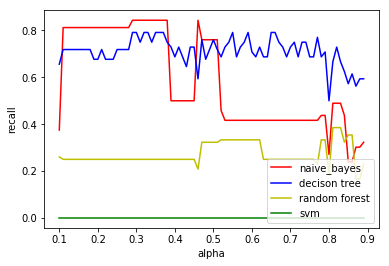

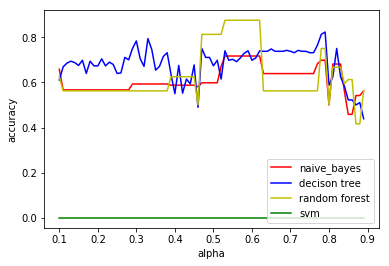

In [37]:
import matplotlib.pyplot as plt
plt.ylabel('recall')
plt.xlabel('alpha')
alpha_list = np.arange(0.1, 0.9, 0.01)
print alpha_list
# recall_tree_list = []
# recall_bayes_list = []
# recall_random_list = []
# recall_svm_list = []
# acc_tree_list = []
# acc_bayes_list= []
# acc_random_list = []
# acc_svm_list = []
plt.plot(alpha_list,  recall_bayes_list,   'r', label = "naive_bayes")
plt.plot(alpha_list,  recall_tree_list,   'b', label = "decison tree")
plt.plot(alpha_list, recall_random_list, 'y', label = "random forest")
plt.plot(alpha_list, recall_svm_list, 'g', label = "svm")
plt.legend(loc='lower right')
plt.savefig('alpha_recall.png')
plt.show()

plt.ylabel('accuracy')
plt.xlabel('alpha')
plt.plot(alpha_list,  acc_bayes_list,   'r', label = "naive_bayes")
plt.plot(alpha_list,  acc_tree_list,   'b', label = "decison tree")
plt.plot(alpha_list, acc_random_list, 'y', label = "random forest")
plt.plot(alpha_list, acc_svm_list, 'g', label = "svm")
plt.legend(loc='lower right')
plt.savefig('alpha_acc.png')
plt.show()





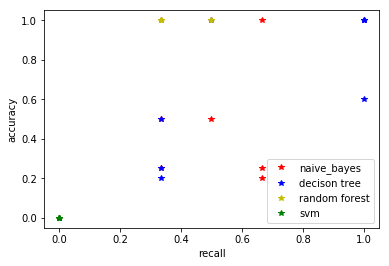

In [31]:
plt.ylabel('accuracy')
plt.xlabel('recall')

plt.plot(recall_naive_bayes,  accuracy_naive_bayes,   'r*', label = "naive_bayes")
plt.plot(recall_tree,  accuracy_tree,   'b*', label = "decison tree")
plt.plot(recall_random, accuracy_random, 'y*', label = "random forest")
plt.plot(recall_svm, accuracy_svm, 'g*', label = "svm")
plt.legend(loc='lower right')
plt.show()

In [32]:
recall_naive_bayes_rate = sum(recall_naive_bayes)*1.0 / len(recall_naive_bayes)
accuracy_naive_bayes_rate = sum(accuracy_naive_bayes)*1.0 / len(accuracy_naive_bayes)
recall_tree_rate = sum(recall_tree)*1.0 / len(recall_tree)
accuracy_tree_rate = sum(accuracy_tree)*1.0 / len(accuracy_tree)
recall_svm_rate = sum(recall_svm)*1.0 / len(recall_svm)
accuracy_svm_rate = sum(accuracy_svm)*1.0 / len(accuracy_svm)
recall_random_rate = sum(recall_random)*1.0 / len(recall_random)
accuracy_random_rate = sum(accuracy_random)*1.0 / len(accuracy_random)
print "recall_naive_bayes_rate: ", recall_naive_bayes_rate
print "accuracy_naive_bayes_rate: ", accuracy_naive_bayes_rate
print "recall_tree_rate: ", recall_tree_rate
print "accuracy_tree_rate: ", accuracy_tree_rate
print "recall_svm_rate: ", recall_svm_rate
print "accuracy_svm_rate: ", accuracy_svm_rate
print "recall_random_rate: ", recall_random_rate
print "accuracy_random_rate: ", accuracy_random_rate

recall_naive_bayes_rate:  0.5
accuracy_naive_bayes_rate:  0.5875
recall_tree_rate:  0.6875
accuracy_tree_rate:  0.69375
recall_svm_rate:  0.0
accuracy_svm_rate:  0.0
recall_random_rate:  0.25
accuracy_random_rate:  0.625


In [33]:
from sklearn.datasets import load_iris
from sklearn import tree

iris = load_iris()
clf = clf.fit(iris.data, iris.target)

tree.export_graphviz(clf, out_file='tree_1.dot') 

NotFittedError: This GaussianNB instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.